In [9]:
#coding:utf-8
'''
哈尔小波变换
https://blog.csdn.net/u010006643/article/details/50493566
'''
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyexcel_xls import get_data

In [10]:
src = cv2.imread('datas/f2.jpg',0)

In [20]:
rows,cols = src.shape
src_float32 = np.float32(src)
wavelet = np.ones((rows,cols),np.float32)
dst = np.zeros_like(src)
tmp = np.zeros_like(wavelet)
imgtmp = np.zeros_like(wavelet)
idx_y = np.arange(0,rows // 2).reshape((rows // 2,1))
idx_x = np.arange(0,cols).reshape((1,cols))

idx_y_2 = np.arange(0,rows).reshape((rows,1))
idx_x_2 = np.arange(0,cols // 2).reshape((1,cols // 2))

# src_half_img_h = src_float32[(idx_y,idx_x)]
for i in range(rows // 2):
    for j in range(cols):
        tmp[i,j] = (src_float32[i * 2,j] + src_float32[i * 2 + 1,j]) / 2
        tmp[i + rows // 2,j] = (src_float32[i * 2,j] - src_float32[i * 2 + 1,j]) / 2


for i in range(rows):
    for j in range(cols // 2):
        wavelet[i,j] = (src_float32[i ,j * 2] + src_float32[i ,j* 2 + 1]) / 2
        wavelet[i ,j+ cols // 2] = (src_float32[i ,j* 2] - src_float32[i,j * 2 + 1]) / 2
imgtmp = wavelet
# dst[(idx_y,idx_x)] = tmp[(idx_y,idx_x)]
# dst[(idx_y_2,idx_x_2)] = wavelet[(idx_y_2,idx_x_2)]

In [21]:
dst = cv2.convertScaleAbs(imgtmp)

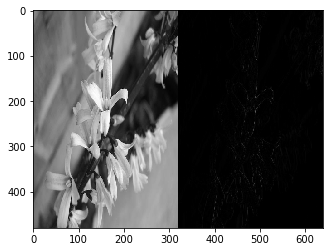

In [22]:
plt.imshow(dst,'gray')

In [40]:
src_f = np.float32(src)
m,n = src_f.shape
J = 1
output = np.zeros_like(src_f)
# 进行J尺度哈尔小波变换
N = n // 2
M = m // 2

for k in range(J):
    # 哈尔小波行变换
    for i in range(m):
        for j in range(N):
            output[i,j] = (src_f[i,2 * j - 1] + src_f[i,2 * j]) / 1.414
            output[i,N + j] = (src_f[i,2 * j - 1] - src_f[i,2*j]) / 1.414
            
    src_f = output
    for j in range(n):
        for i in range(M):
            output[i,j] = (src_f[2 * i - 1,j] + src_f[2 * i,j]) / 1.414
            output[i + M,j] = (src_f[2 * i - 1,j] - src_f[2 * i,j]) / 1.414
    
    M = M // 2
    N = N // 2
    
    m = m // 2
    n = n // 2
    
    src_f = output
    output = cv2.convertScaleAbs(output)

C:\Users\jenson\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\jenson\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


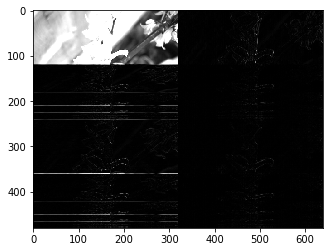

In [38]:
plt.imshow(output,'gray')